In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [24]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price INTEGER
)
""")
conn.commit()


In [25]:
data = [
    ('Laptop', 15, 55000),
    ('Laptop', 10, 55000),
    ('Smartphone', 40, 25000),
    ('Smartphone', 35, 25000),
    ('Wireless Headphones', 30, 3000),
    ('Wireless Headphones', 20, 3000),
    ('Office Chair', 12, 7000),
    ('Office Chair', 8, 7000)
]

cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()


In [26]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""


In [27]:
df = pd.read_sql_query(query, conn)


In [28]:
print(df)


               product  total_qty  revenue
0               Laptop         25  1375000
1         Office Chair         20   140000
2           Smartphone         75  1875000
3  Wireless Headphones         50   150000


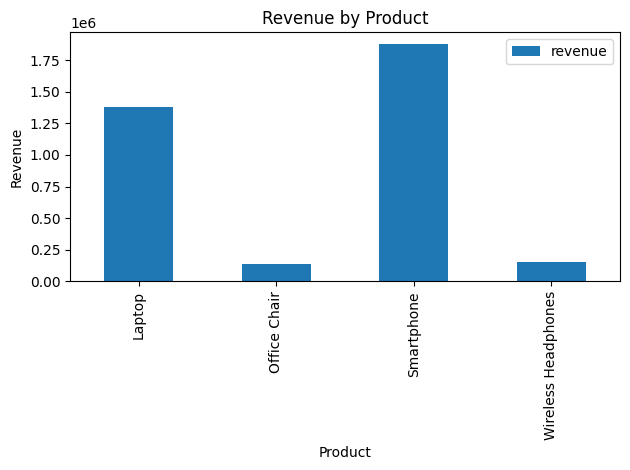

In [32]:
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [33]:
conn.close()
